#Imports and Setup

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import json
import matplotlib.pyplot as plt
from scipy.io import arff
from IPython.core.debugger import set_trace

from sklearn.datasets import load_iris

np.random.seed(1234)


#Dataset Loading and Preprocessing

In [ ]:
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data', header = None)
#arff2 = arff.loadarff('sample_data/messidor_features.arff')
df2 = pd.read_csv('/content/messidor_features.csv', header = None)#pd.DataFrame(arff2)
#^I have no idea how to work with arff files but if u remove the header from arff and read it as csv its the same thing



trainratio = 0.8

#REPLACING INVALID VALUES
#replace ? with NaN to use pd df.fillna and make sure everything is float
df1 = (df1.replace(to_replace='?',value=np.nan)).astype(float)
#df2 doesnt have missing values, but has label at the last index instead of first; must flip
#can discard first feature as its always 1
df2.iloc[:,0] = df2.iloc[:,df2.shape[1]-1]
#df2 has binary classes ranging from 0-1, need to change to 1-2 to avoid division by zero in entropy
for i in {0,1,18,19}:
  df2.iloc[:,i] = df2.iloc[:,i]+1

# shuffle then split into train and test
df1 = df1.sample(frac=1).reset_index(drop=True)
df2 = df2.sample(frac=1).reset_index(drop=True)

df1_train = df1[0:int(df1.shape[0]*trainratio)]
df2_train = df2[0:int(df2.shape[0]*trainratio)]

df1_test = df1[int(df1.shape[0]*trainratio):]
df2_test = df2[int(df2.shape[0]*trainratio):]

#replace '?'/nan in each with mode (not done directly to not influence train with data from test)
df1_train_means = df1_train.mean(axis=0)
df1_test_means = df1_test.mean(axis=0)
df1_train_replace = df1_train.mode(axis=0).iloc[0]
df1_test_replace = df1_test.mode(axis=0).iloc[0]
#mode for binary values instead of average
for i in {1,14,15,16,17,18}:
  df1_train_replace[i] = df1_train_means[i]
  df1_test_replace[i] = df1_test_means[i]


df1_train = df1_train.fillna(df1_train_replace)
df1_test = df1_test.fillna(df1_test_replace)

ParserError: ignored

#Dataset Selection

In [ ]:
#DATA
ds = 2  #set to 1 for hepatitis data, set to 2 for retinopathy

x_train = None
y_train = None
x_test = None
y_test = None

if ds == 1:
  x_train = df1_train.loc[:,1:]
  y_train = df1_train.loc[:,0]
  x_test = df1_test.loc[:,1:]
  y_test = df1_test.loc[:,0]
elif ds == 2:
  x_train = df2_train.loc[:,1:]
  y_train = df2_train.loc[:,0]
  x_test = df2_test.loc[:,1:]
  y_test = df2_test.loc[:,0]



#Outdated section


In [ ]:
'''
# Panda Dataframe to numpy
x = x.to_numpy()

x = np.asfarray(x, dtype = float)

#TARGET
y = ds.iloc[:,0]

# Panda Dataframe to numpy
y = y.to_numpy()

y = y.ravel() - 1


(N, D) = x.shape
C = np.max(y)+1
 

np.random.seed(1234)
inds = np.random.permutation(N)


# Creating Training and test set
#Trainings
x_train,y_train = x[inds[:50]],y[inds[:50]]

print(x_train.shape, y_train.shape)


#Test set
x_test,y_test = x[inds[50:]],y[inds[50:]]

                         

print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')



#print(x_train)
#print(y_train)
#print(x_test)
#print(y_test)


#PLOTTING GRAPH
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', label='train')
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='s', label='test')
plt.legend()
plt.ylabel('Alk Phosphate')
plt.xlabel('Age')
plt.show()
'''

"\n# Panda Dataframe to numpy\nx = x.to_numpy()\n\nx = np.asfarray(x, dtype = float)\n\n#TARGET\ny = ds.iloc[:,0]\n\n# Panda Dataframe to numpy\ny = y.to_numpy()\n\ny = y.ravel() - 1\n\n\n(N, D) = x.shape\nC = np.max(y)+1\n \n\nnp.random.seed(1234)\ninds = np.random.permutation(N)\n\n\n# Creating Training and test set\n#Trainings\nx_train,y_train = x[inds[:50]],y[inds[:50]]\n\nprint(x_train.shape, y_train.shape)\n\n\n#Test set\nx_test,y_test = x[inds[50:]],y[inds[50:]]\n\n                         \n\nprint(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')\n\n\n\n#print(x_train)\n#print(y_train)\n#print(x_test)\n#print(y_test)\n\n\n#PLOTTING GRAPH\nplt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', label='train')\nplt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='s', label='test')\nplt.legend()\nplt.ylabel('Alk Phosphate')\nplt.xlabel('Age')\nplt.show()\n"

# Selection of Features by Mutual Information

In [ ]:
mutual_information = []
indexesForBar = []
for i in range(0,x_train.iloc[1].size):
  mutual_information.append(sp.stats.entropy(x_train.iloc[:,i], y_train))
  indexesForBar.append(i)

In [ ]:
mutual_information

[0.07129065303028932,
 0.22201032920157981,
 0.22461537497296521,
 0.23260328033985975,
 0.2448517926692399,
 0.267869955957318,
 0.2945153843099012,
 0.40191297636986967,
 0.42874673042607736,
 0.6905789934204141,
 1.0309996214930486,
 1.8346764225304701,
 2.155738590678567,
 2.332508218833043,
 2.37733711856235,
 0.0590048576969103,
 0.07302511473243395,
 0.12181973829382445,
 0.0]

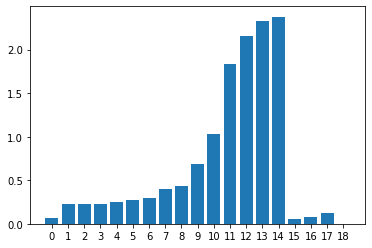

In [ ]:
figentropy = plt.figure()
plt.bar(indexesForBar, mutual_information)
plt.xticks(indexesForBar,indexesForBar)
plt.show() # for retinopathy the highest information is at 14, then 13, then 12 starting from 0
           # for hepatitis, the highest information is at  13 then 15 starting from 0

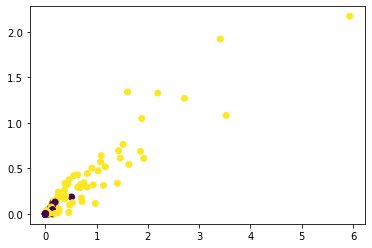

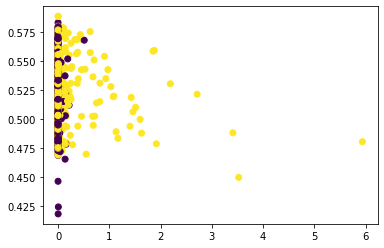

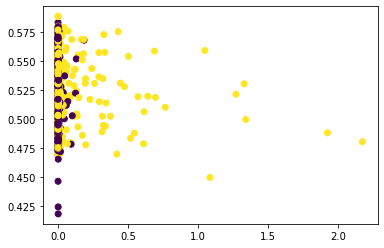

In [ ]:
if ds == 2:
  plt.scatter(x_train.iloc[:,13], x_train.iloc[:,14], c=y_train, marker='o', label='train')
  plt.show()
  plt.scatter(x_train.iloc[:,13], x_train.iloc[:,15], c=y_train, marker='o', label='train')
  plt.show()
  plt.scatter(x_train.iloc[:,14], x_train.iloc[:,15], c=y_train, marker='o', label='train')
  plt.show()
elif ds == 1:
  plt.scatter(x_train.iloc[:,14], x_train.iloc[:,16], c=y_train, marker='o', label='train')
  plt.show()

In [ ]:
if ds == 1:
  x_train = x_train.iloc[:,[14,16]]#use features 14 16 so drop the rest
  x_test = x_test.iloc[:,[14,16]]
elif ds == 2:
  x_train = x_train.iloc[:,[14,15]]#use features 14 15 so drop the rest ##ADDED 13 AS EXPERIMENT
  x_test = x_test.iloc[:,[14,15]]



i=1 and j=0


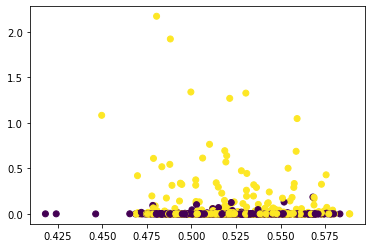

i=2 and j=0


IndexError: ignored

In [ ]:
for i in range(0,19):
  for j in range (0,i):
    print("i="+str(i)+" and j="+str(j))
    plt.scatter(x_train.iloc[:,i], x_train.iloc[:,j], c=y_train, marker='o', label='train')
    plt.show()

#Conversion to Numpy Arrays

In [ ]:
x_train = x_train.to_numpy()
y_train = (y_train.astype(int)-1).to_numpy()
x_test = x_test.to_numpy()
y_test = (y_test.astype(int)-1).to_numpy()

#KNN

In [ ]:
#define the metric we will use to measure similarity
#if the input shapes are [1,N1,F] and [N2,1,F] then output shape is [N2,N1]
#as numpy supports broadcasting with arithmetic operations
#for more on numpy broadcasting refer to: https://numpy.org/doc/stable/user/basics.broadcasting.html   
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2,axis = -1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)


class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn                                                    #we need to use self because the parameters would be stored in variables 
                                                                                #on the stack and would be discarded when the init method goes out of scope
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self
    
    def predict(self, x_test):
        

        ''' Makes a prediction using the stored training data and the test data given as argument'''
        
        num_test = x_test.shape[0]
        #calculate distance between the training & test samples and returns an array of shape [num_test, num_train]


                
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        # print("The shape of the distances is", distances.shape)                          
        #When operating on two arrays, NumPy compares their shapes element-wise. 
        #It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when: they are equal, or one of them is 1

        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))


        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]  
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K                                                          #nd you just divided by K so that we scale the value from zero to 1.
        
        return y_prob, knns

In [ ]:
a = [1,2,3,4,5,6,7,8,9,10]
for n in a:
  model = KNN(K=n)
  y_prob, knns = model.fit(x_train, y_train).predict(x_test)
  y_pred = np.argmax(y_prob,axis=-1)                                                #This returns the indeces of the largest element in the array
  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
  print(f'{accuracy*100:.1f}')

51.9
55.4
54.5
56.7
58.0
59.3
56.7
59.3
58.9
57.6


In [ ]:
model = KNN(K=1)

model.fit(x_train, y_train)

y_prob, knns = model.predict(x_test)
#y_prob = np.delete(y_prob, 0, 1)
print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)


#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob,axis=-1)                                                #This returns the indeces of the largest element in the array
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
# print(y_pred)


#this is problem oneeeeeeeeeeeeeeeee
print(f'accuracy is {accuracy*100:.1f}.')

#boolean array to later slice the indexes of correct and incorrect predictions
correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

#connect each node to k-nearest neighbours in the training set
for i in range(x_test.shape[0]):
    for k in range(model.K):
        hor = x_test[i,0], x_train[knns[i,k],0]
        ver = x_test[i,1], x_train[knns[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)
    
plt.ylabel('Alk Phosphate')
plt.xlabel('Age')
plt.legend()
plt.show()


NameError: ignored

In [ ]:
from numpy.core.fromnumeric import ravel
#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x_train[:,0]), np.max(x_train[:,0]), 200)
x1v = np.linspace(np.min(x_train[:,1]), np.max(x_train[:,1]), 200)

#to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for k in range(1,4):
  model = KNN(K=k)

  y_train_prob = np.zeros((y_train.shape[0], C))
  y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

  #to get class probability of all the points in the 2D grid
  y_prob_all, _ = model.fit(x_train, y_train).predict(x_all)

  y_pred_all = np.zeros_like(y_prob_all)
  y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

  print(y_train_prob[:,0])

  plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob[:,1], marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all[:,1], marker='.', alpha=0.01)
  plt.ylabel('Alk Phosphate')
  plt.xlabel('Age')
  plt.show()

NameError: ignored

accuracy is 77.4.


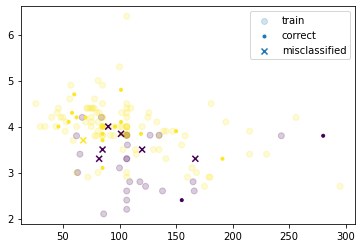

In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left= None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            #print(node.labels[left_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0] #Gives the total number of instances to the left and the right
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    #print(labels)
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

class DecisionTree:
    def __init__(self, num_classes=None, max_depth=5, cost_fn=cost_gini_index, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        pass                            #pass in python 3 means nothing happens and the method here is empty
    
    def predict(self, data_test):
        pass
    
def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    #below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self

def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        
        return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
        return
    #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices,split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node) #This is basically to classify the number of data points which the current node is going to classify
    #For instance the first node will have to classify 100 instances whereas as we go down, the instances would reduce and we would have to classify fewer instances
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict


#Experiment
tree = DecisionTree(max_depth=20)
probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test,1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')
#visualization
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.show()

In [ ]:
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for n in a:

  tree = DecisionTree(max_depth=n)
  monster = tree.fit(x_train, y_train)
  probs_test = monster.predict(x_test)
  y_pred = np.argmax(probs_test,1)
  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
  #print(n)
  print(f'{accuracy*100:.1f}.')

77.4.
77.4.
74.2.
77.4.
77.4.
77.4.
77.4.
77.4.
77.4.
77.4.
77.4.
77.4.
77.4.
77.4.
77.4.
77.4.
77.4.
77.4.
77.4.
77.4.


In [ ]:
#Decision Boundries
x0v = np.linspace(np.min(x_train[:,0]), np.max(x_train[:,0]), 200)
x1v = np.linspace(np.min(x_train[:,1]), np.max(x_train[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

model = DecisionTree(max_depth=200)
y_train_prob = np.zeros((y_train.shape[0], C))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
y_prob_all = model.fit(x_train, y_train).predict(x_all)

plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob[:,0], marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all[:,0], marker='.', alpha=.01)
plt.ylabel('Alk Phosphate')
plt.xlabel('Age')
plt.show()

Streaming output truncated to the last 5000 lines.
[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 

IndexError: ignored